## Análise e Geração de Gráficos

In [1]:
!pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Import e Tratamento dos dados da otimização de hiperparâmetros 

In [5]:
results = pd.read_csv("pinns/gaussian_pulse/results.csv")

In [6]:
def convert_to_array(s):
    s = s.replace('\n', '')  # Remove \n
    s = s.replace('[', '').replace(']', '')  # Remove colchetes
    array = np.array([float(x) for x in s.split()])  # Converte para array NumPy
    return array

In [6]:
results['Solução Predita'] = results['Solução Predita'].apply(convert_to_array)

### Gráfico Comparativo usando a seção x = 5, t = 2 * pi

In [7]:
# Ordenar os resultados pela 'Loss'
sorted_results = results.sort_values(by='Loss Teste')

In [10]:
sorted_results[:35]

,ID,Taxa de Aprendizado,Número de Camadas Ocultas,Número de Neurônios por Camada,Ativação,Solução Predita,Loss Treino,Loss Teste,Error HPO
16,16,0.001123,10,120,Swish,[[ 4.71709296e-04]\n [ 4.93972562e-04]\n [ 5.1...,[3.1925896e-01 5.3157797e-03 1.1762002e-03 8.3...,0.000264,0
3,3,0.000750,9,76,Swish,[[ 1.46826729e-04]\n [ 1.48927793e-04]\n [ 1.4...,[3.0501452e-01 3.8875991e-03 2.2472609e-03 4.6...,0.000273,0
11,11,0.002268,10,120,Swish,[[-3.82773578e-04]\n [-3.90015543e-04]\n [-3.9...,[3.1309003e-01 4.1692839e-03 6.6075395e-03 2.5...,0.000286,0
2,2,0.005200,7,92,Swish,[[-1.10246241e-04]\n [-1.26896426e-04]\n [-1.4...,[3.0595756e-01 4.3076826e-03 1.3834669e-03 1.2...,0.000377,0
30,30,0.000660,10,120,sin,[[ 5.81659144e-04]\n [ 4.38876217e-04]\n [ 3.0...,[1.04808559e+01 1.01782113e-01 2.78066956e-02 ...,0.000384,0
41,41,0.002027,8,120,Swish,[[ 3.73372808e-04]\n [ 3.79821286e-04]\n [ 3.8...,[2.9990450e-01 1.6582806e-03 4.3792487e-03 4.6...,0.000391,0
31,31,0.001525,7,120,sin,[[ 1.84644759e-03]\n [ 1.74746662e-03]\n [ 1.6...,[4.3956623e+00 9.8791331e-02 2.6530838e-02 2.1...,0.000734,0
4,4,0.002073,4,107,sin,[[-4.50303341e-05]\n [ 7.09305023e-05]\n [ 1.7...,[2.3459154e+01 1.3729115e-01 4.3877080e-02 1.8...,0.001198,0
9,9,0.005114,5,49,Swish,[[5.39705157e-04]\n [5.40420413e-04]\n [5.4350...,[7.8884208e-01 1.5106180e-02 3.7346059e-03 1.9...,0.001216,0
10,10,0.002278,8,114,sin,[[1.78836542e-03]\n [1.68603915e-03]\n [1.5832...,[9.4534998e+00 2.0988354e-01 1.9580077e-02 3.8...,0.001501,0


In [9]:
# Pega o top 10
top_10_results = sorted_results.head(10)

In [8]:
# Configurações do Seaborn
palette = sns.color_palette("rocket")
sns.set_palette(palette)
sns.set_style("ticks", {'axes.grid': True})

# Criar a figura e o eixo
fig, ax1 = plt.subplots(figsize=(16, 8))

# Definir os rótulos dos eixos com LaTeX
ax1.set_xlabel(r'$y$', fontsize=14)
ax1.set_ylabel(r'$u(x = 5, y, t = 2\pi)$', fontsize=14)

# Número de valores
num_values = 128
y = np.linspace(0, 10, num_values).reshape(-1, 1)

# Plotar as linhas com Seaborn
for i, (_, result) in enumerate(top_10_results.iterrows()):
    label = f"{result['ID']} - LR: {result['Taxa de Aprendizado']}, Layers: {result['Número de Camadas Ocultas']}, Nodes: {result['Número de Neurônios por Camada']}, Activ.: {result['Ativação']}"
    sns.lineplot(x=y.flatten(), y=result['Solução Predita'], linewidth=2, label=label, ax=ax1)

# Adicionar a legenda
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Salvar a figura
fig.savefig('plots/comparison_plot', bbox_inches='tight')
plt.close(fig)

### Latex da tabela dos hpo's

In [46]:
# Função para converter string para array numpy de floats
def str_to_sum_list(s):
    # Remove os colchetes e converte para lista de floats
    float_list = list(map(float, s.strip('[]').split()))
    # Converte a lista para um array numpy
    return sum(float_list)

# Aplica a função a cada linha da coluna "Loss Treino"
sorted_results["Loss Treino"] = sorted_results["Loss Treino"].apply(str_to_sum_list)

In [1]:
header = "Iteração & Taxa de Aprendizado & Profundidade & Largura & Função de Ativação & Loss de Treino & Loss de Teste \\\\"
print(header)

def scientific_notation_latex(value):
    base, exp = f"{value:.2e}".split('e')
    exp = int(exp)  # Remove o zero à esquerda convertendo para inteiro
    return f"{base} \\times 10^{{{exp}}}"

# Loop para os dados das linhas
for index, row in sorted_results.head(10).iterrows():
    taxa_aprendizado = scientific_notation_latex(row['Taxa de Aprendizado'])
    loss_treino = scientific_notation_latex(row['Loss Treino'])
    loss_teste = scientific_notation_latex(row['Loss Teste'])
    
    linha = (
        f"${row['ID']}$ & "
        f"${taxa_aprendizado}$ & "
        f"${row['Número de Camadas Ocultas']}$ & "
        f"${row['Número de Neurônios por Camada']}$ & "
        f"${row['Ativação']}$ & "
        f"${loss_treino}$ & "
        f"${loss_teste}$ \\\\"
    )
    print(linha)

Iteração & Taxa de Aprendizado & Profundidade & Largura & Função de Ativação & Loss de Treino & Loss de Teste \\


NameError: name 'sorted_results' is not defined

# Gráfico comparando loss treino e teste pra melhor configuração

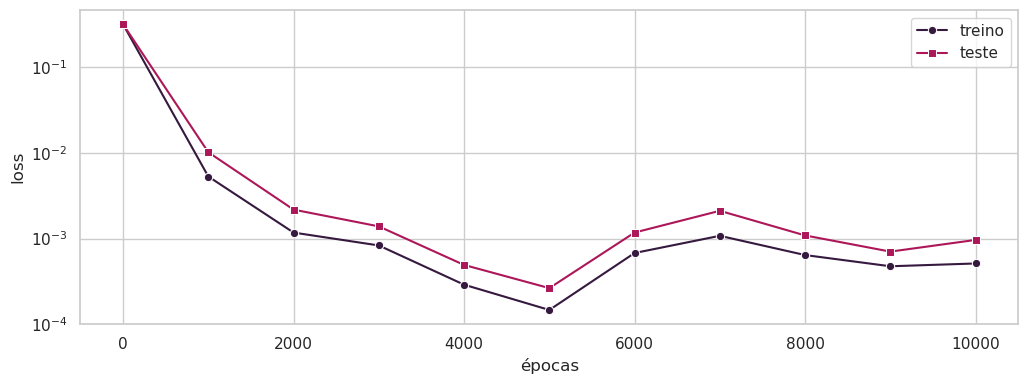

In [9]:
file_path = "outputs/loss/loss_16.dat"

# Inicializar listas para armazenar os dados
timesteps = []
loss_train = []
loss_test = []

# Ler o arquivo
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        if not line.startswith("#"):
            data = line.split()
            if data:
                # Converter a linha para float e separar os dados
                data = list(map(float, data))
                timesteps.append(data[0])
                loss_train.append(sum(data[1:7]))
                loss_test.append(sum(data[7:13]))

# Converter listas para arrays numpy
timesteps = np.array(timesteps)
loss_train = np.array(loss_train)
loss_test = np.array(loss_test)

import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do Seaborn
sns.set(style="whitegrid")

# Inicializando a figura
plt.figure(figsize=(20, 4))

# Subplot
plt.subplot(1, 2, 1)

# Plotando a perda de treinamento e teste
sns.lineplot(x=timesteps, y=loss_train, marker='o', label='treino', color=sns.color_palette("rocket")[0])
sns.lineplot(x=timesteps, y=loss_test, marker='s', label='teste', color=sns.color_palette("rocket")[2])

# Configurando o gráfico
plt.yscale("log")
plt.xlabel('épocas')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
plt.close()


In [114]:
# # Criação do gráfico de pontos
# fig, ax = plt.subplots()
# sns.lineplot(x=np.arange(0, 50, 1), y=np.log10(sorted_results['Loss Teste']), marker='*', ax=ax)

# # Configuração dos eixos e título
# ax.set_xlabel('Ranking')
# ax.set_ylabel(r'$log_{10}(\mathcal{L}_{\theta^{*}}[\lambda]$)')

# # Ajustes adicionais para melhorar a visualização em escala logarítmica
# ax.grid(True, which="both", ls="--")
# ax.minorticks_on()

# # Salvar o gráfico
# fig.savefig('pinns/gaussian_pulse/plots/loss_hpo.png', bbox_inches='tight')
# plt.close(fig)

### Gráfico comparando melhor solução contra solver numérico

In [11]:
sol_malha_128 = pd.read_csv("pulso_sol_libmesh.csv")

In [12]:
sol_malha_128.head()

,u,ids,object_id,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,1.563600e-26,65,0,1,0.00,5,0.00,0
1,1.195600e-13,65,0,1,0.01,5,0.01,0
2,2.391200e-13,65,0,1,0.02,5,0.02,0
3,3.586900e-13,65,0,1,0.03,5,0.03,0
4,4.782500e-13,65,0,1,0.04,5,0.04,0


In [15]:
sol_malha_128['Points:1'].unique().shape

(1001,)

ValueError: array length 128 does not match index length 1000

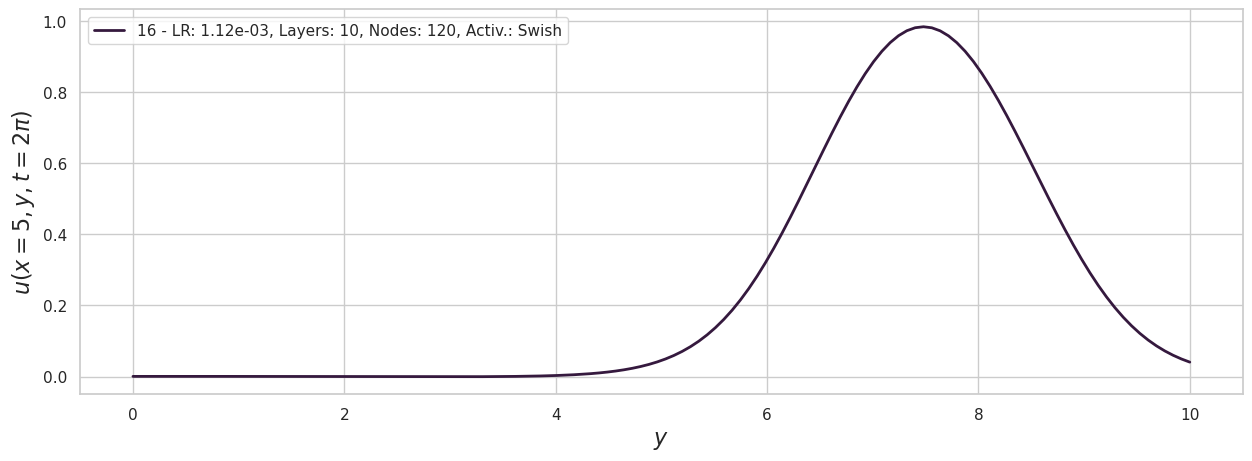

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura e o eixo
fig, ax1 = plt.subplots(figsize=(15, 5))

# Definir os rótulos dos eixos com LaTeX
ax1.set_xlabel(r'$y$', fontsize=16)
ax1.set_ylabel(r'$u(x = 5, y, t = 2\pi)$', fontsize=16)

# Plot do melhor modelo
label = f"{sorted_results.iloc[0]['ID']} - LR: {sorted_results.iloc[0]['Taxa de Aprendizado']:.2e}, Layers: {sorted_results.iloc[0]['Número de Camadas Ocultas']}, Nodes: {sorted_results.iloc[0]['Número de Neurônios por Camada']}, Activ.: {sorted_results.iloc[0]['Ativação']}"
sns.lineplot(x=y.flatten(), y=sorted_results.iloc[0]['Solução Predita'], linewidth=2,  label=label, ax=ax1, color=sns.color_palette("rocket")[0])

label = "Elementos Finitos (FEM)"
sns.lineplot(x=y.flatten(), y=sol_malha_128.iloc[:-1]["u"], linewidth=2, label=label, ax=ax1, color=sns.color_palette("rocket")[2])

# Aumentar o tamanho da legenda
ax1.legend(fontsize=14)  # Ajuste o valor de fontsize conforme necessário

# Mostrar e salvar a figura
plt.show()
fig.savefig('plots/best_compare_solver.png', bbox_inches='tight')
plt.close(fig)
